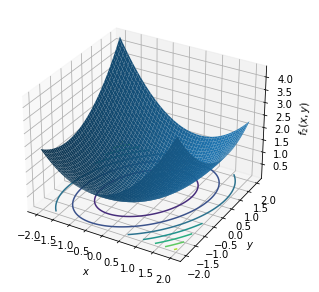

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML
xmin, xmax = -2, 2 
ymin, ymax = -2, 2 

def f2(x, y):
    return 1/2*x**2 + 1/3*y**2 - x*y/4

nx = np.linspace(xmin,xmax,100)
ny = np.linspace(ymin,ymax,100)
x,y = np.meshgrid(nx,ny)
z = f2(x, y)


fig = plt.figure(figsize=[8,5])
ax = fig.gca(projection='3d', aspect="auto")
ax.plot_surface(x,y,z, alpha=1.0)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f_2(x,y)$')
plt.show()

In [18]:
def derivative2(f, xy, d=0.001):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_fix(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    dx = 0.05

    for i in range(N):
        
        df_now = derivative2(f, x_now) 
        x_next = x_now - df_now*dx
        
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

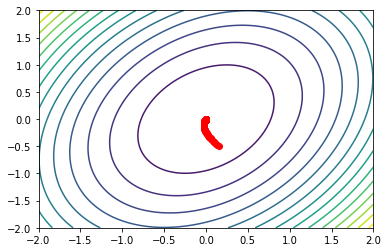

Min_fixed step Method:  1.2603597895173012e-25   Iterations:   1001
[ 0.15046511 -0.49761268] 0.11257766950805899
[-3.24535786e-13 -6.06400658e-13] 1.2603597895173012e-25


In [19]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def f2(x): #complex function with 2 minimum
    return x[0]*x[0]/2 + x[1]*x[1]/3 - x[0]*x[1]/4 
    #return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
    
def init(x_min, x_max, y_min, y_max):             
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

def minimize_fix(f,x0, N=1000):
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    dx = 0.05

    for i in range(N):
        df_now = derivative2(f, x_now) 
        x_next = x_now - df_now*dx
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)


[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_fix(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print("Min_fixed step Method: ", f_min, '  Iterations:  ', len(x_hist))
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))

In [13]:
#Scipy
def f2(x):
    return 1/2*x[0]**2 + 1/3*x[1]**2 - x[0]*x[1]/4
from scipy.optimize import minimize
[x0, y0] = x0y0random(xmin, xmax, ymin, ymax)

res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 83


In [14]:
res = minimize(f2, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


In [15]:
res = minimize(f2, [x0,y0], method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


In [16]:
res = minimize(f2, [x0,y0], method='powell', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 65
